# [OpenCV-Python Tutorial] Feature Matching

In this notebook, we will see how to extract SIFT(Scale-Invariant Feature Transform) and match SIFT features of two images with OpenCV-Python.

---

In [1]:
# For python2/3 compatibility
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import numpy as np
import cv2 # OpenCV-Python
%matplotlib inline
import matplotlib.pyplot as plt
import time

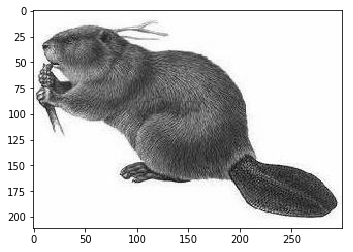

In [2]:
# Load an image
beaver = cv2.imread('../images/beaver.png')
plt.imshow(cv2.cvtColor(beaver, cv2.COLOR_BGR2RGB))

In [3]:
# Members of cv2.xfeatures2d
dir(cv2.xfeatures2d)

['BoostDesc_create',
 'BriefDescriptorExtractor_create',
 'DAISY_NRM_FULL',
 'DAISY_NRM_NONE',
 'DAISY_NRM_PARTIAL',
 'DAISY_NRM_SIFT',
 'DAISY_create',
 'FREAK_NB_ORIENPAIRS',
 'FREAK_NB_PAIRS',
 'FREAK_NB_SCALES',
 'FREAK_create',
 'LATCH_create',
 'LUCID_create',
 'PCTSIGNATURES_GAUSSIAN',
 'PCTSIGNATURES_HEURISTIC',
 'PCTSIGNATURES_L0_25',
 'PCTSIGNATURES_L0_5',
 'PCTSIGNATURES_L1',
 'PCTSIGNATURES_L2',
 'PCTSIGNATURES_L2SQUARED',
 'PCTSIGNATURES_L5',
 'PCTSIGNATURES_L_INFINITY',
 'PCTSIGNATURES_MINUS',
 'PCTSIGNATURES_NORMAL',
 'PCTSIGNATURES_REGULAR',
 'PCTSIGNATURES_UNIFORM',
 'PCTSignaturesSQFD_create',
 'PCTSignatures_GAUSSIAN',
 'PCTSignatures_HEURISTIC',
 'PCTSignatures_L0_25',
 'PCTSignatures_L0_5',
 'PCTSignatures_L1',
 'PCTSignatures_L2',
 'PCTSignatures_L2SQUARED',
 'PCTSignatures_L5',
 'PCTSignatures_L_INFINITY',
 'PCTSignatures_MINUS',
 'PCTSignatures_NORMAL',
 'PCTSignatures_REGULAR',
 'PCTSignatures_UNIFORM',
 'PCTSignatures_create',
 'PCTSignatures_drawSignature',
 

# Extract SIFT features from an image

## 1. SIFT detector

(211, 300, 3) => (211, 300)


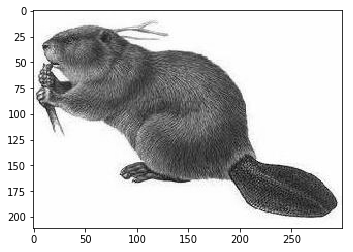

In [4]:
# Convert image color(BGR->Grayscale)
gray = cv2.cvtColor(beaver, cv2.COLOR_BGR2GRAY)
# You can convert the image when calling cv2.imread()
# gray = cv2.imread('images/beaver.png', cv2.IMREAD_GRAYSCALE)

print(str(beaver.shape) + " => " + str(gray.shape))
plt.imshow(gray, cmap='gray')

In [5]:
# SIFT feature detector/descriptor
sift = cv2.xfeatures2d.SIFT_create()

In [6]:
# SIFT feature detection
start_time = time.time()
# kp = sift.detect(gray, None) # 2nd pos argument is a mask indicating a part of image to be searched in
kp = sift.detect(beaver, None) # 2nd pos argument is a mask indicating a part of image to be searched in
print('Elapsed time: %.6fs' % (time.time() - start_time))

Elapsed time: 0.060747s


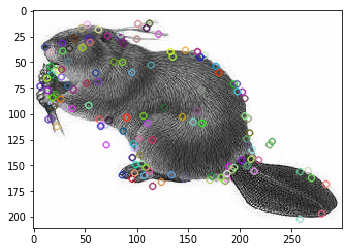

In [7]:
# Display the SIFT features
beaver_sift = cv2.drawKeypoints(beaver, kp, None)
plt.imshow(cv2.cvtColor(beaver_sift, cv2.COLOR_BGR2RGB))

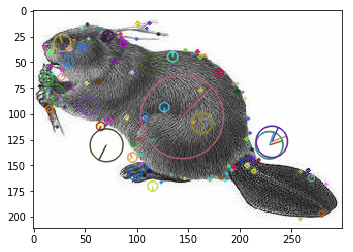

In [8]:
# Display the rich SIFT features
beaver_sift2 = cv2.drawKeypoints(beaver, kp, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(cv2.cvtColor(beaver_sift2, cv2.COLOR_BGR2RGB))

In [10]:
# Inspect the keypoints
print(type(kp))
print(len(kp))

<type 'list'>
144


In [11]:
print(type(kp[0]))
print(dir(kp[0]))

<type 'cv2.KeyPoint'>
['__class__', '__delattr__', '__doc__', '__format__', '__getattribute__', '__hash__', '__init__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', 'angle', 'class_id', 'octave', 'pt', 'response', 'size']


In [12]:
# A keypoint's property
# kp is sorted by scale of the keypoints
print(kp[-1].angle) # Orientation
print(kp[-1].class_id)
print(kp[-1].octave)
print(kp[-1].pt) # Position
print(kp[-1].response)
print(kp[-1].size) # Scale

314.42098999
-1
7340548
(144.0298309326172, 103.08189392089844)
0.0774702951312
80.109336853


## 2. Extract SIFT descriptor

In [13]:
# Extract SIFT feature from the (gray) image and detected keypoints
start_time = time.time()
kp, des = sift.compute(gray, kp)
print('Elapsed time: %.6fs' % (time.time() - start_time))

# SIFT keypoints and descriptors at the same time
# start_time = time.time()
# kp, des = sift.detectAndCompute(gray, None)
# print('Elapsed time: %.6fs' % (time.time() - start_time))

Elapsed time: 0.018626s


In [14]:
# Inspect the descriptors
print(type(des))
print(des.shape)
print(des.dtype)

<type 'numpy.ndarray'>
(144, 128)
float32


In [15]:
print(len(des[0, :]))
print(des[0, :])

128
[ 105.   19.    0.    0.    0.    0.    0.   14.  179.   42.    0.    0.
    0.    0.    0.    8.  102.   17.    0.    0.    0.    0.    0.    1.
    5.    4.    1.    1.    0.    0.    1.    1.  147.   28.    0.    0.
    0.    0.    0.   13.  179.   23.    0.    0.    0.    0.    0.   23.
  145.    5.    0.    0.    0.    0.    1.   19.    3.    1.    0.    0.
    0.    0.    5.    7.  112.   17.    0.    0.    0.    0.    0.   21.
  179.   22.    0.    0.    0.    0.    0.   41.  145.    6.    0.    0.
    0.    0.    0.   13.    5.    1.    0.    0.    0.    1.    0.    2.
  100.    4.    0.    0.    0.    0.    1.   48.  179.    0.    0.    0.
    0.    0.    0.  100.   74.    4.    0.    0.    0.    0.    0.   19.
    4.    3.    1.    0.    0.    0.    0.    1.]


---

# Feature Matching

## 1. SIFT Feature Matching

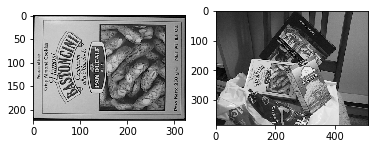

In [16]:
# Open and show images
img1 = cv2.imread('../images/box.png')
img2 = cv2.imread('../images/box_in_scene.png')

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))

In [17]:
# SIFT feature extracting
sift = cv2.xfeatures2d.SIFT_create()
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

start_time = time.time()
kp1, des1 = sift.detectAndCompute(gray1, None)
kp2, des2 = sift.detectAndCompute(gray2, None)
print('Elapsed time: %.6fs' % (time.time() - start_time))

print('Image 1 - %d feature detected' % des1.shape[0])
print('Image 2 - %d feature detected' % des2.shape[0])

Elapsed time: 0.201250s
Image 1 - 604 feature detected
Image 2 - 969 feature detected


In [18]:
# BFMatcher(Brute Force Matcher) with defalut setting
bf = cv2.BFMatcher(cv2.NORM_L2)
matches = bf.knnMatch(des1, des2, k=2)
print('%d matches' % len(matches))

604 matches


In [19]:
# Inspect matcher results
print(type(matches))
print(len(matches))
print(type(matches[0]))
print(len(matches[0]))

<type 'list'>
604
<type 'list'>
2


In [20]:
print(type(matches[0][0]))
print(dir(matches[0][0]))

<type 'cv2.DMatch'>
['__class__', '__delattr__', '__doc__', '__format__', '__getattribute__', '__hash__', '__init__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', 'distance', 'imgIdx', 'queryIdx', 'trainIdx']


In [21]:
print(matches[0][0].distance)
print(matches[0][0].queryIdx)
print(matches[0][0].trainIdx)
print(matches[0][0].imgIdx)
print(matches[0][1].distance)
print(matches[0][1].queryIdx)
print(matches[0][1].trainIdx)
print(matches[0][1].imgIdx)

220.331573486
0
196
0
275.205383301
0
666
0


In [22]:
# Apply ratio test as in David Rowe's paper
good_matches = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good_matches.append(m)
print('%d matches' % len(good_matches))

80 matches


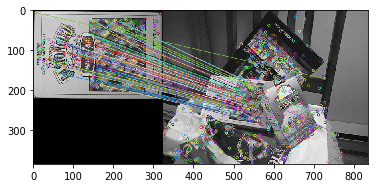

In [23]:
# Display matches
img3 = cv2.drawMatches(img1, kp1, img2, kp2, good_matches, None)
plt.imshow(cv2.cvtColor(img3, cv2.COLOR_BGR2RGB))

## 2. SIFT Mathing with Hellinger Distance

In [24]:
# L1 normalization
des1 = des1 / np.repeat(np.sum(des1, axis = 1).reshape(des1.shape[0], 1), des1.shape[1], axis=1)
des2 = des2 / np.repeat(np.sum(des2, axis = 1).reshape(des2.shape[0], 1), des2.shape[1], axis=1)

# Calculate Hellinger distance for every feature pair
dist_mat = np.sqrt(1.0 - np.dot(np.sqrt(des1), np.sqrt(des2).transpose()))

# Match with ratio test
min_arg = np.argsort(dist_mat, axis=1)
good_matches = []
for i in range(dist_mat.shape[0]):
    m, n = min_arg[i][0:2]
    if dist_mat[i][m] < dist_mat[i][n] * 0.75:
        dmatch = cv2.DMatch(i, m, 0, dist_mat[i][m]) # _queryIdx, _trainIdx, _imgIdx, _distance
        good_matches.append(dmatch)

print('%d matches' % len(good_matches))

81 matches


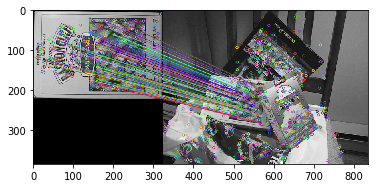

In [25]:
img4 = cv2.drawMatches(img1, kp1, img2, kp2, good_matches, None)
plt.imshow(cv2.cvtColor(img4, cv2.COLOR_BGR2RGB))

---

# Homography from SIFT Matching

##  1. Get Homography Matrix

In [26]:
# Points matched by cv2.
src_pts = np.float32([ kp1[m.queryIdx].pt for m in good_matches ]).reshape(-1,1,2)
dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good_matches ]).reshape(-1,1,2)

print("Source points: ")
print(src_pts[:3])
print("Destination points: ")
print(dst_pts[:3])

Source points: 
[[[ 141.46821594   56.05900955]]

 [[  44.23154449   97.01319122]]

 [[ 226.05569458   33.94643021]]]
Destination points: 
[[[ 182.44432068  194.40507507]]

 [[ 142.73655701  202.46737671]]

 [[ 229.14028931  188.03056335]]]


In [27]:
# Find homography matrix with RANSAC algorithm
M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)
matchesMask = mask.ravel().tolist()
print(M)
print(matchesMask)

[[  4.40258181e-01  -1.61255409e-01   1.18809754e+02]
 [ -1.01240245e-03   4.06515862e-01   1.60999384e+02]
 [ -2.53676682e-04  -3.42662036e-04   1.00000000e+00]]
[1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [28]:
# Calculate the object position in the scene using homography
h,w = img1.shape[0:2]
pts = np.float32([ [0,0],[0,h],[w,h],[w,0] ]).reshape(-1,1,2)
dst = cv2.perspectiveTransform(pts,M)
print(dst)

[[[ 118.80975342  160.99938965]]

 [[  89.70443726  272.4730835 ]]

 [[ 267.9994812   298.69961548]]

 [[ 284.86697388  175.05973816]]]


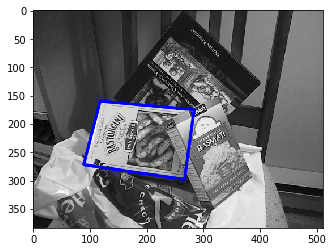

In [29]:
# Display the object
img2 = cv2.polylines(img2,[np.int32(dst)],True,(255,0,0),3, cv2.LINE_AA)
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))

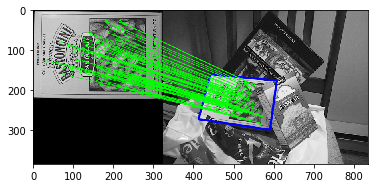

In [30]:
# Draw the inlier points matched by RANSAC
draw_params = dict(matchColor = (0,255,0), # draw matches in green color
                   singlePointColor = None,
                   matchesMask = matchesMask, # draw only inliers
                   flags = 2)

img3 = cv2.drawMatches(img1,kp1,img2,kp2,good_matches,None,**draw_params)
plt.imshow(cv2.cvtColor(img3, cv2.COLOR_BGR2RGB))

---

# Practice - SIFT mosaic

In the practice you make a mosaic of two maps using SIFT Feature matching.

- Extract SIFT features of two images.
- Match SIFT features using `cv2.BFMatcher()`. L2 distance is good enough find the transformation.
- Find the perspective transform of two images using `cv2.findHomography()`.
- Draw two images with one image warped to the another one.

Here's the desired output.

<img src="../images/river_result.png" width="600">

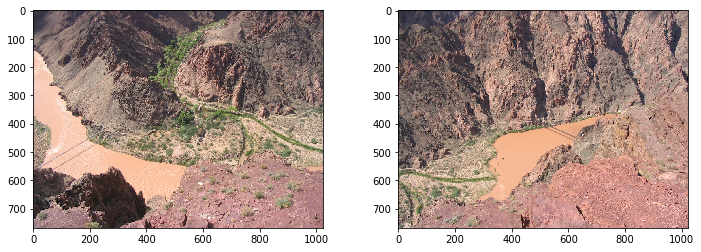

In [31]:
# Open and show the input images
img1 = cv2.imread('../images/river1.jpg')
img2 = cv2.imread('../images/river2.jpg')

plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))

In [32]:
# SIFT feature extracting
sift = cv2.xfeatures2d.SIFT_create()
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

kp1, des1 = sift.detectAndCompute(gray1, None)
kp2, des2 = sift.detectAndCompute(gray2, None)

print('Image 1 - %d feature detected' % des1.shape[0])
print('Image 2 - %d feature detected' % des2.shape[0])

Image 1 - 8861 feature detected
Image 2 - 9345 feature detected


In [33]:
# BFMatcher(Brute Force Matcher) with defalut setting
bf = cv2.BFMatcher(cv2.NORM_L2)
matches = bf.knnMatch(des1, des2, k=2)
print('%d matches' % len(matches))

# Apply ratio test as in David Rowe's paper
good_matches = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good_matches.append(m)
print('%d matches' % len(good_matches))

8861 matches
1352 matches


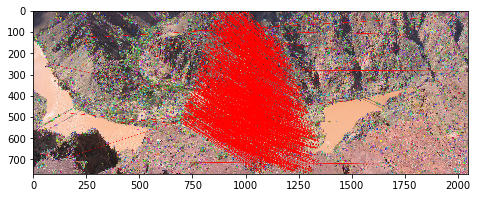

In [34]:
# Display SIFT matches
img3 = cv2.drawMatches(img1, kp1, img2, kp2, good_matches, None, matchColor = (0,0,255))
plt.figure(figsize=(9,3))
plt.imshow(cv2.cvtColor(img3, cv2.COLOR_BGR2RGB))

In [35]:
trans_x = 0
trans_y = 500
trans = np.float32([[1, 0, trans_x], [0, 1, trans_y], [0, 0, 1]])

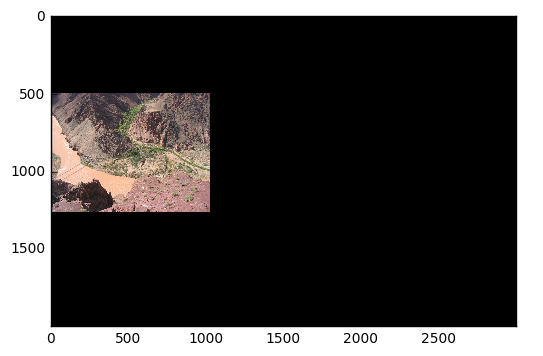

In [35]:
# Output mosaic
out = np.zeros((2000,3000,3),dtype=np.uint8)
# The first image translated
out = cv2.warpPerspective(img1, trans, (3000, 2000), out, borderMode=cv2.BORDER_TRANSPARENT)

# Fill code below to find the homography between two images and warp the second image over 'out'
# Note that the transformation should be composition of perspective and translation.
#================ YOUR CODE HERE ===================



#===================================================

plt.imshow(cv2.cvtColor(out, cv2.COLOR_BGR2RGB))